In [3]:
from hssm import hssm
import ssms.basic_simulators
import arviz as az

import pandas as pd
import numpy as np
from hssm.utils import Param

## Simulating a dataset. 
-  dataset passed to the model should always include 'rt' and 'response'.
-  dataset should have a format of pandas dataframe.

In [4]:
import pytensor

pytensor.config.floatX = "float32"

In [5]:
# Simulate some data
v_true, a_true, z_true, t_true, sv_true = [0.5, 1.5, 0.5, 0.5, 0.3]
obs_ddm = ssms.basic_simulators.simulator(
    [v_true, a_true, z_true, t_true, sv_true], model="ddm", n_samples=1000
)
obs_ddm = np.column_stack([obs_ddm["rts"][:, 0], obs_ddm["choices"][:, 0]])

dataset = pd.DataFrame(obs_ddm, columns=["rt", "response"])

In [6]:
dataset["x"] = dataset["rt"] * 0.1

In [7]:
dataset["y"] = dataset["rt"] * 0.5

In [8]:
dataset

,rt,response,x,y
0,1.500991,1.0,0.150099,0.750495
1,1.997014,-1.0,0.199701,0.998507
2,2.460036,1.0,0.246004,1.230018
3,2.165022,1.0,0.216502,1.082511
4,1.391992,1.0,0.139199,0.695996
...,...,...,...,...
995,1.867008,1.0,0.186701,0.933504
996,2.017015,1.0,0.201701,1.008507
997,2.553034,1.0,0.255303,1.276517
998,2.087018,1.0,0.208702,1.043509


### Basic Usage
#### DDM

#### Analytical model 

In [9]:
trace_angle_ddm_base = hssm.HSSM(data=dataset)

In [10]:
trace_angle_ddm_base.model

       Formula: c(rt, response) ~ 1
        Family: analytical
          Link: v = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Uniform(lower: -3.0, upper: 3.0)
        
        Auxiliary parameters
            c(rt, response)_t ~ Uniform(lower: 0.0, upper: 2.009999990463257)
            c(rt, response)_z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
            c(rt, response)_a ~ Uniform(lower: 0.5, upper: 2.009999990463257)
            c(rt, response)_sv ~ Uniform(lower: 0.0, upper: 1.2000000476837158)

In [11]:
trace_angle_ddm_base.priors

{'c(rt, response)': {'Intercept': Uniform(lower: -3.0, upper: 3.0)},
 'sv': Uniform(lower: 0.0, upper: 1.2000000476837158),
 'a': Uniform(lower: 0.5, upper: 2.009999990463257),
 'z': Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421),
 't': Uniform(lower: 0.0, upper: 2.009999990463257)}

In [12]:
samples = trace_angle_ddm_base.sample()

Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_t, c(rt, response)_z, c(rt, response)_a, c(rt, response)_sv, Intercept]
INFO:pymc:NUTS: [c(rt, response)_t, c(rt, response)_z, c(rt, response)_a, c(rt, response)_sv, Intercept]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 9 seconds.
INFO:pymc:Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 9 seconds.


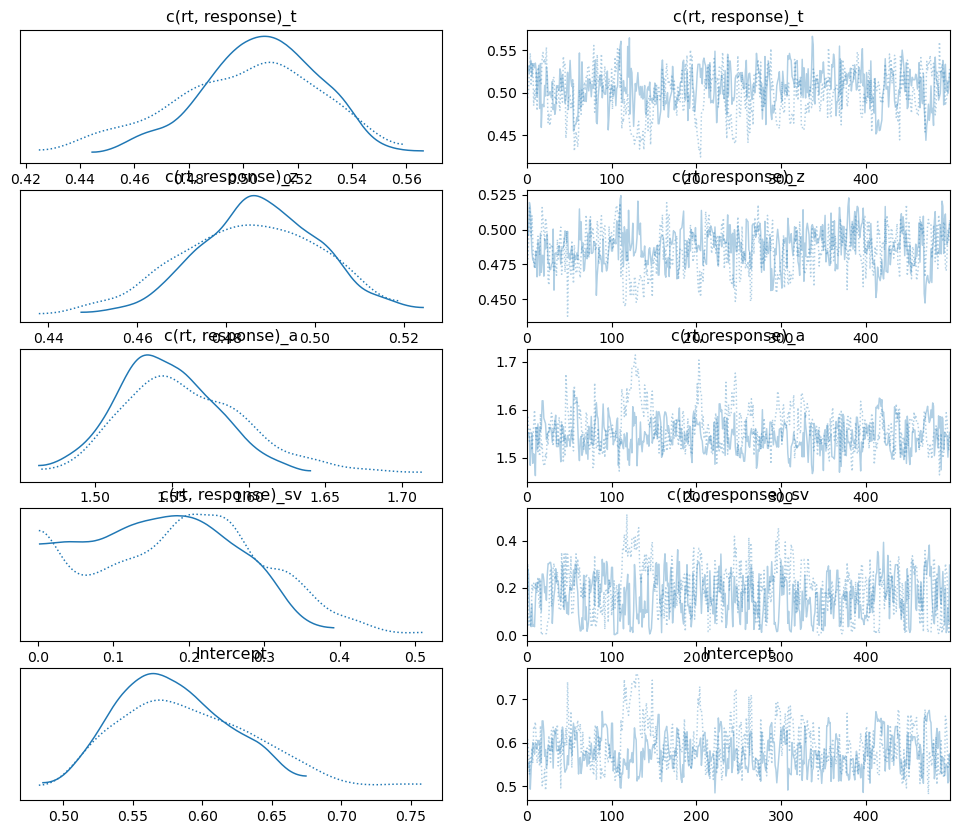

In [13]:
az.plot_trace(samples);

#### Approx_differentiable 

#### Simulating Angle Data

In [10]:
# Simulate some data
v_true, a_true, z_true, t_true, theta_true = [0.5, 1.5, 0.5, 0.5, 0.3]
obs_angle = ssms.basic_simulators.simulator(
    [v_true, a_true, z_true, t_true, theta_true], model="angle", n_samples=1000
)
obs_angle = np.column_stack([obs_angle["rts"][:, 0], obs_angle["choices"][:, 0]])
dataset_lan = pd.DataFrame(obs_angle, columns=["rt", "response"])

In [11]:
trace_angle_ddm_lan = hssm.HSSM(data=dataset_lan, model="angle")

In [12]:
trace_angle_ddm_lan.model

       Formula: c(rt, response) ~ 1
        Family: approx_differentiable
          Link: v = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Uniform(lower: -3.0, upper: 3.0)
        
        Auxiliary parameters
            c(rt, response)_a ~ Uniform(lower: 0.0, upper: 1.2000000476837158)
            c(rt, response)_z ~ Uniform(lower: 0.0, upper: 2.009999990463257)
            c(rt, response)_theta ~ Uniform(lower: 0.0, upper: 2.009999990463257)
            c(rt, response)_t ~ Uniform(lower: 0.0, upper: 0.8999999761581421)

In [8]:
pytensor.config.floatX = "float32"

samples_lan = trace_angle_ddm_lan.sample(
    cores=2, draws=500, tune=500, mp_ctx="forkserver"
)

Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_z, c(rt, response)_a, c(rt, response)_theta, c(rt, response)_t, Intercept]
INFO:pymc:NUTS: [c(rt, response)_z, c(rt, response)_a, c(rt, response)_theta, c(rt, response)_t, Intercept]
/Users/aomar7/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aomar7/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxvers

Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 40 seconds.
INFO:pymc:Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 40 seconds.


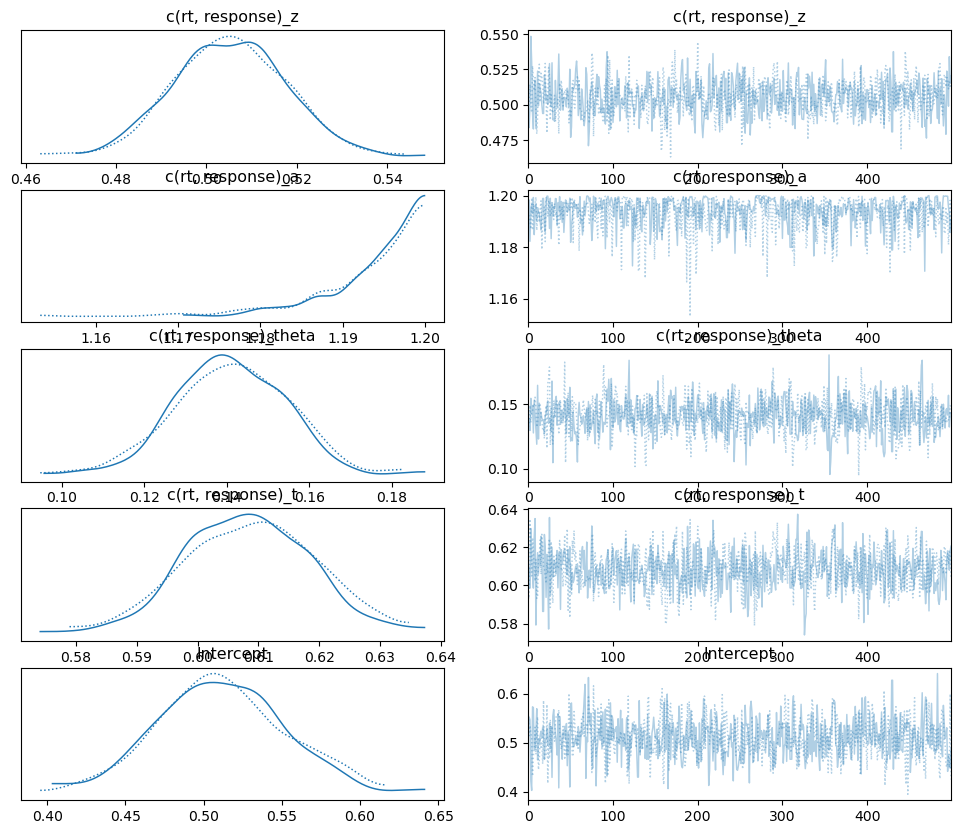

In [9]:
az.plot_trace(samples_lan);

#### Using jax

In [10]:
from jax.config import config

config.update("jax_enable_x64", False)

samples_lan = trace_angle_ddm_lan.sample(sampler="jax")

Compiling...
Compilation time =  0:00:00.882108
Sampling...


sample: 100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.27it/s, 7 steps of size 3.87e-01. acc. prob=0.93]


Sampling time =  0:01:01.738575
Transforming variables...
Transformation time =  0:00:00.119608


### Using include paramater to use regression and update priors.

#### Case 1: Regression type formula. 

In [13]:
hssm_include = hssm.HSSM(
    data=dataset,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -3.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "v ~ 1 + x + y",
            "link": "identity",
        }
    ],
)

In [14]:
hssm_include.model

       Formula: c(rt, response) ~ 1 + x + y
        Family: analytical
          Link: v = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Uniform(lower: -3.0, upper: 3.0)
            x ~ Uniform(lower: -0.5, upper: 0.5)
            y ~ Uniform(lower: -0.5, upper: 0.5)
        
        Auxiliary parameters
            c(rt, response)_a ~ Uniform(lower: 0.5, upper: 2.009999990463257)
            c(rt, response)_z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
            c(rt, response)_sv ~ Uniform(lower: 0.0, upper: 1.2000000476837158)
            c(rt, response)_t ~ Uniform(lower: 0.0, upper: 2.009999990463257)

In [12]:
hssm_include.link

{'v': 'identity'}

In [13]:
hssm_include.params

[v ~ 1 + x + y
 Link: identity
 Intercept ~ Uniform(lower: -3.0, upper: 3.0)
 x ~ Uniform(lower: -0.5, upper: 0.5)
 y ~ Uniform(lower: -0.5, upper: 0.5),
 sv ~ Uniform(lower: 0.0, upper: 1.2000000476837158),
 a ~ Uniform(lower: 0.5, upper: 2.009999990463257),
 z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421),
 t ~ Uniform(lower: 0.0, upper: 2.009999990463257)]

In [14]:
samples = hssm_include.sample()

Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_sv, c(rt, response)_a, c(rt, response)_t, c(rt, response)_z, Intercept, x, y]
INFO:pymc:NUTS: [c(rt, response)_sv, c(rt, response)_a, c(rt, response)_t, c(rt, response)_z, Intercept, x, y]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 49 seconds.
INFO:pymc:Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 49 seconds.


array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'c(rt, response)_sv'}>,
        <AxesSubplot: title={'center': 'c(rt, response)_sv'}>],
       [<AxesSubplot: title={'center': 'c(rt, response)_t'}>,
        <AxesSubplot: title={'center': 'c(rt, response)_t'}>],
       [<AxesSubplot: title={'center': 'c(rt, response)_a'}>,
        <AxesSubplot: title={'center': 'c(rt, response)_a'}>],
       [<AxesSubplot: title={'center': 'c(rt, response)_z'}>,
        <AxesSubplot: title={'center': 'c(rt, response)_z'}>]],
      dtype=object)

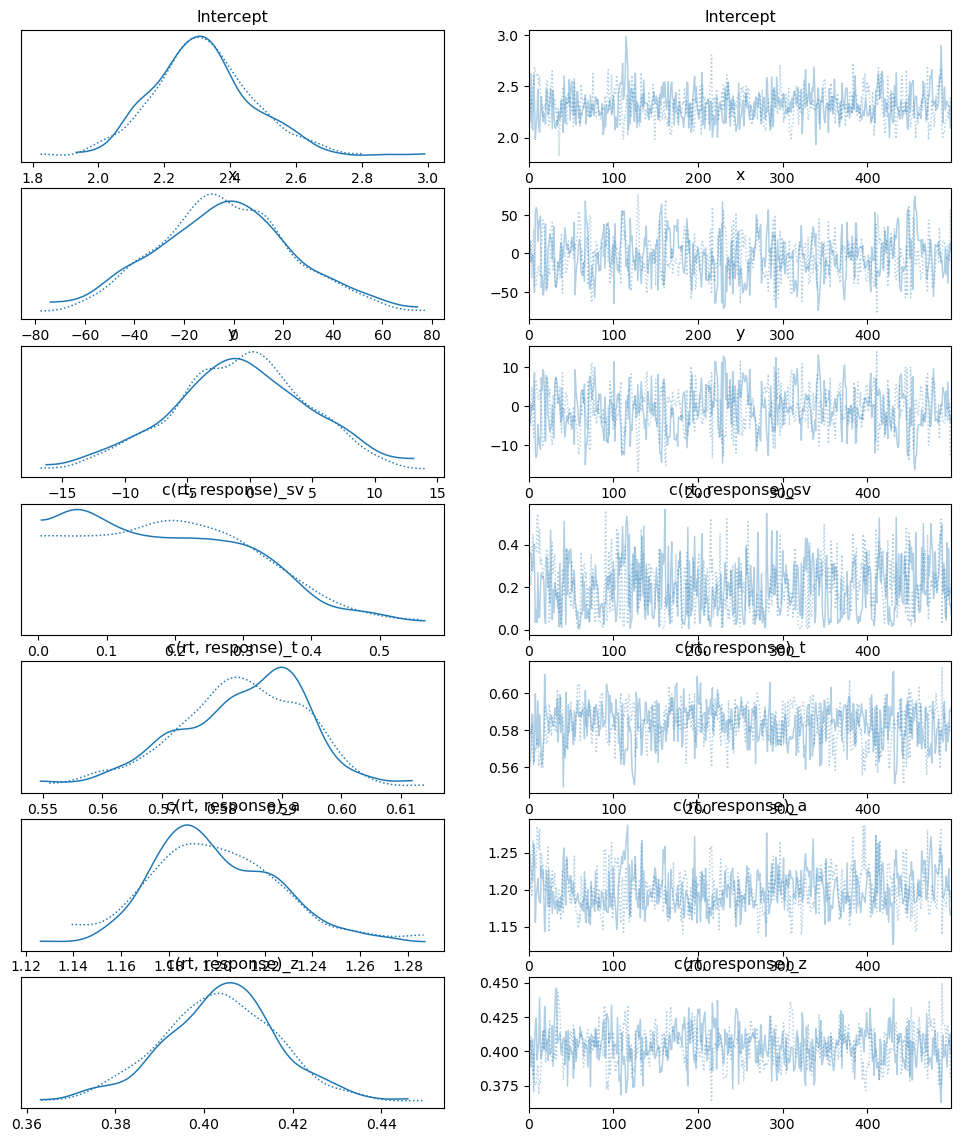

In [34]:
az.plot_trace(samples)

#### Case 2: adding initval to priors along with lower and upper.

In [19]:
hssm_include_val = hssm.HSSM(
    data=dataset,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": -3.0,
                    "upper": 3.0,
                    "initval": 1.0,
                },
                "x": {"name": "Uniform", "lower": -0.5, "upper": 0.5, "initval": 0},
            },
            "formula": "v ~ 1 + x",
        }
    ],
)

In [16]:
hssm_include_val.params

[v ~ 1 + x
 Link: identity
 Intercept ~ Uniform(lower: -3.0, upper: 3.0, initval: 1.0)
 x ~ Uniform(lower: -0.5, upper: 0.5, initval: 0.0),
 sv ~ Uniform(lower: 0.0, upper: 1.2000000476837158),
 a ~ Uniform(lower: 0.5, upper: 2.009999990463257),
 z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421),
 t ~ Uniform(lower: 0.0, upper: 2.009999990463257)]

In [17]:
samples_two = hssm_include_val.sample()

Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_a, c(rt, response)_z, c(rt, response)_sv, c(rt, response)_t, Intercept, x]
INFO:pymc:NUTS: [c(rt, response)_a, c(rt, response)_z, c(rt, response)_sv, c(rt, response)_t, Intercept, x]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 514 seconds.
INFO:pymc:Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 514 seconds.


#### Case 3: not specifying parent v in the include parameter. 

In [32]:
hssm_include_val = hssm.HSSM(
    data=dataset,
    include=[
        {
            "name": "a",  # change to name
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": 0.0,
                    "upper": 1.0,
                    "initval": 0.5,
                },
                "x": {"name": "Uniform", "lower": -0.5, "upper": 0.5, "initval": 0},
            },
            "formula": "a ~ 1 + x",
        }
    ],
)

In [33]:
hssm_include_val.formula

Formula('c(rt, response) ~ 1', 'a ~ 1 + x')

In [34]:
hssm_include_val.model

       Formula: c(rt, response) ~ 1
                a ~ 1 + x
        Family: analytical
          Link: v = identity
                a = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Uniform(lower: -3.0, upper: 3.0)
        
        Auxiliary parameters
            c(rt, response)_z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
            c(rt, response)_sv ~ Uniform(lower: 0.0, upper: 1.2000000476837158)
            c(rt, response)_t ~ Uniform(lower: 0.0, upper: 2.009999990463257)
    target = a
        Common-level effects
            a_Intercept ~ Uniform(lower: 0.0, upper: 1.0, initval: 0.5)
            a_x ~ Uniform(lower: -0.5, upper: 0.5, initval: 0.0)

In [35]:
samples_three = hssm_include_val.sample(draws=200, tune=200)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_z, c(rt, response)_sv, c(rt, response)_t, Intercept, a_Intercept, a_x]
INFO:pymc:NUTS: [c(rt, response)_z, c(rt, response)_sv, c(rt, response)_t, Intercept, a_Intercept, a_x]


Sampling 2 chains for 200 tune and 200 draw iterations (400 + 400 draws total) took 11 seconds.
INFO:pymc:Sampling 2 chains for 200 tune and 200 draw iterations (400 + 400 draws total) took 11 seconds.


#### Case 4, including multiple dictionaries in the include parameter. Creating hierarchical model. 

In [37]:
hssm_include_list = hssm.HSSM(
    data=dataset,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -2.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "v ~ 1 + x + y",
        },
        {
            "name": "a",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -2.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "a ~ 1 + x + y",
        },
    ],
)

In [38]:
hssm_include_list.model

       Formula: c(rt, response) ~ 1 + x + y
                a ~ 1 + x + y
        Family: analytical
          Link: v = identity
                a = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Uniform(lower: -2.0, upper: 3.0)
            x ~ Uniform(lower: -0.5, upper: 0.5)
            y ~ Uniform(lower: -0.5, upper: 0.5)
        
        Auxiliary parameters
            c(rt, response)_z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
            c(rt, response)_sv ~ Uniform(lower: 0.0, upper: 1.2000000476837158)
            c(rt, response)_t ~ Uniform(lower: 0.0, upper: 2.009999990463257)
    target = a
        Common-level effects
            a_Intercept ~ Uniform(lower: -2.0, upper: 3.0)
            a_x ~ Uniform(lower: -0.5, upper: 0.5)
            a_y ~ Uniform(lower: -0.5, upper: 0.5)

In [24]:
samples_two = hssm_include_list.sample(draws=100, tune=100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_sv, c(rt, response)_t, c(rt, response)_z, Intercept, x, y, a_Intercept, a_x, a_y]
INFO:pymc:NUTS: [c(rt, response)_sv, c(rt, response)_t, c(rt, response)_z, Intercept, x, y, a_Intercept, a_x, a_y]


Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 243 seconds.
INFO:pymc:Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 243 seconds.


#### Case 5. including multiple dictionaries in the include parameter. Specifying prior as a float number. 

In [43]:
hssm_include_list = hssm.HSSM(
    data=dataset,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -3.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -2.0, "upper": 1.0},
                "y": {"name": "Uniform", "lower": -2.0, "upper": 1.0},
            },
            "formula": "v ~ 1 + x + y",
        },
        {"name": "a", "prior": 0.5},
    ],
)

In [44]:
samples_three = hssm_include_list.sample(draws=100, tune=100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c(rt, response)_z, c(rt, response)_sv, c(rt, response)_t, Intercept, x, y]
INFO:pymc:NUTS: [c(rt, response)_z, c(rt, response)_sv, c(rt, response)_t, Intercept, x, y]


Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 229 seconds.
INFO:pymc:Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 229 seconds.
